In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [31]:
path = '../test_cases/comparison'
files = os.listdir(path)
dfs = []
files

['stereo_s_calib_local_gaussian.csv',
 'dynamicmonocular_s_calib_local_gaussian.csv',
 'lidar_s_calib_local_gaussian.csv']

In [32]:
names = []
for i in range(len(files)):
    
    names.append(files[i].rsplit('calib_local_')[1].rsplit('.csv')[0].strip('2'))
names

['gaussian', 'gaussian', 'gaussian']

In [33]:
# colors = {'gaussian':'red','quadratic':'blue','exp_decay':'green','maplite':'orange'}
colors = {'lidar':'red','stereo':'blue','monocular':'green','maplite':'orange'}
names = {0:'stereo',1:'monocular',2:'lidar'}

In [34]:

for file in files:
    dfs.append(pd.read_csv(os.path.join(path,file)))

In [35]:
for x in dfs:

    x = x.dropna()
    

In [36]:
dmap = np.load('../distance_maps/run1_filtered.npy')
min_x = 737254.704791
max_x = 748093.029759
min_y = 3391022.43960
max_y = 3400671.03915
map_resolution_x = 1.6850629615057993
map_resolution_y = 1.500093213502397

In [37]:
def error_map(e,n):
    x = (e - min_x)/map_resolution_x
    y = (n-min_y)/map_resolution_y
    # print(x,y)

    return float(dmap[int(y),int(x)])

In [38]:
map_errors = []

for i in range(len(dfs)):
    error=[]
    e_vals = dfs[i].pf_e
    n_vals = dfs[i].pf_n


    for i in range(len(e_vals)):
        error.append(error_map(e_vals[i],n_vals[i]))

    map_errors.append(error)

<Figure size 864x576 with 0 Axes>

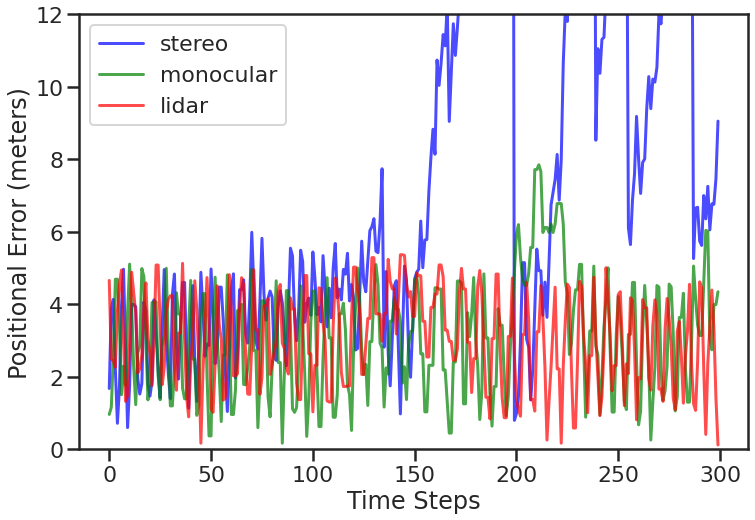

In [39]:
import seaborn as sns
plt.figure(figsize=(12,8))
# sns.set_theme(
sns.set_style('ticks')
sns.set_context("poster")
plt.figure(figsize=(12,8))
for i in range(len(map_errors)):
    plt.plot(map_errors[i][200:500],label=names[i],c=colors[names[i]],alpha=0.7)
plt.legend()
plt.ylim([0,12])
plt.xlabel('Time Steps')
plt.ylabel('Positional Error (meters)')
plt.savefig('Map_error_quadratic_global.png',dpi=300)

In [40]:
# print("Mean Error:",np.mean(errors[100:500]))
for i in range(len(dfs)):
    print("\n Mean error for "+names[i]+" = {}".format(np.mean(map_errors[i][400:480])))


 Mean error for stereo = 10.903163597572371

 Mean error for monocular = 3.899183266765701

 Mean error for lidar = 2.675731588720354


<AxesSubplot:ylabel='Density'>

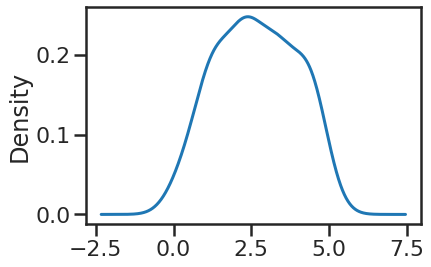

In [41]:
s  =pd.Series(map_errors[2][400:500])
s.plot.kde()

Text(0, 0.5, 'Positional Error (meters)')

<Figure size 864x576 with 0 Axes>

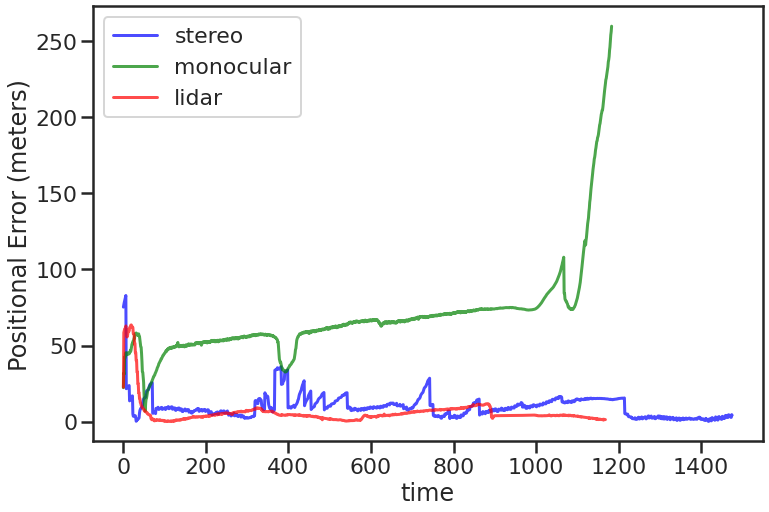

In [42]:
import seaborn as sns
plt.figure(figsize=(12,8))
# sns.set_theme(
sns.set_style('ticks')
sns.set_context("poster")
plt.figure(figsize=(12,8))
for i in range(len(dfs)):
    plt.plot(dfs[i].error[:],label=names[i],c=colors[names[i]],alpha=0.7)
    plt.legend()
plt.xlabel('time')
plt.ylabel('Positional Error (meters)')
# plt.savefig('seen_local_error.svg',dpi=300)

In [43]:
for i in range(len(dfs)):
    print("\n Mean error for "+names[i]+" = {}".format(dfs[i].error[100:600].mean()))


 Mean error for stereo = 10.851688564422126

 Mean error for monocular = 55.064598611573224

 Mean error for lidar = 3.695468515986535


<Figure size 864x576 with 0 Axes>

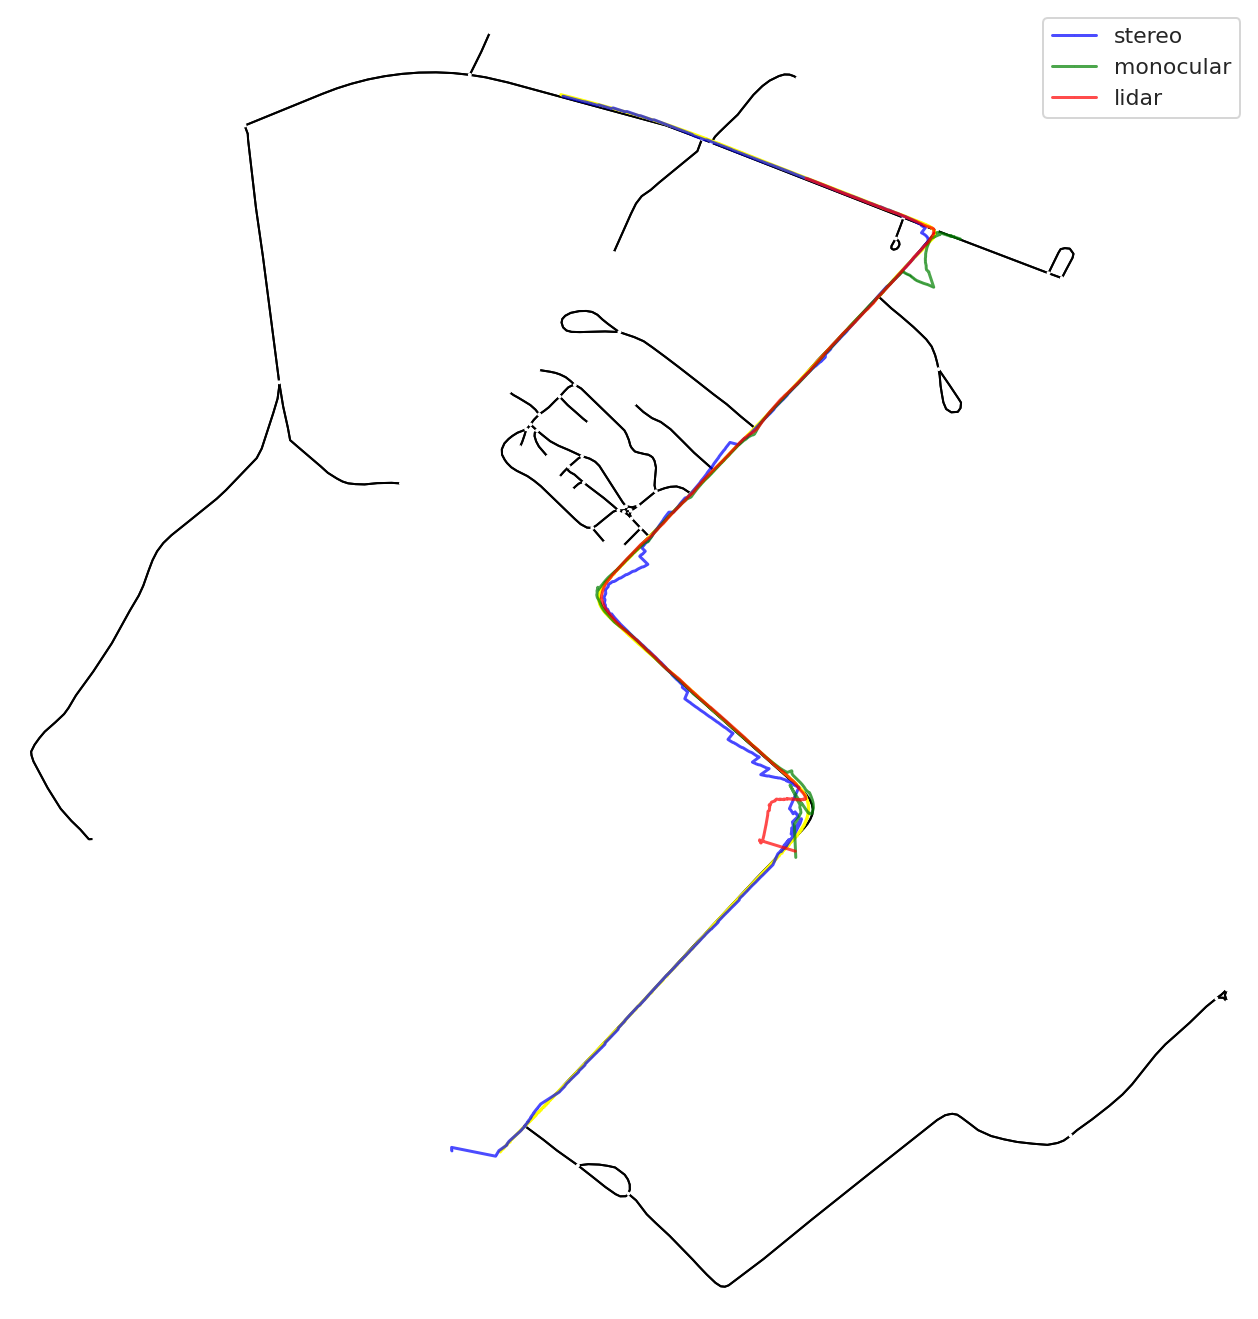

In [44]:
import seaborn as sns
plt.figure(figsize=(12,8))
# sns.set_theme(
sns.set_style('ticks')
sns.set_context("poster")
import osmnx as ox


g = ox.graph_from_point((30.6950,-96.4635 ),dist=950,dist_type="bbox")

# cf = '["highway"~"motorway|motorway_link|trunk|trunk_link|primary|primary_link|secondary|secondary_link|tertiary|tertiary_link|road|road_link|service|service_link|unclassified|unclassified_link"]'
# t = {"highway": True,"building":True,"landuse":True}
# gdf = ox.geometries_from_point((30.690984,-96.46288 ),dist=1200,tags=t)
# g=ox.graph_from_place('Modena, Italy')
g = ox.project_graph(g)
# gdf= ox.projection.project_gdf(gdf)
# fig,ax = ox.plot.plot_footprints(gdf,color="white")
# g = ox.graph_from_point((743024.69,3398103.49),dist=1000)
fig,ax=ox.plot.plot_graph(g,bgcolor='white',figsize=(40,24),edge_color='black',edge_linewidth=2,show=False, close=False)
ax.plot(dfs[0].gps_e,dfs[0].gps_n,c='yellow',marker='.',markersize=2)
for i in range(len(dfs)):
    ax.plot(dfs[i].pf_e,dfs[i].pf_n,c=colors[names[i]],marker='.',markersize=0.1,label=names[i],alpha=0.7)
plt.legend()

plt.show()
fig.savefig('seen_local_map.svg',dpi=300)

In [45]:
df_local = pd.read_csv('local_logs_with_error.csv')
df_local.dropna(inplace=True)
df_local.head()

FileNotFoundError: [Errno 2] No such file or directory: 'local_logs_with_error.csv'

In [ ]:
df_local.error.plot()

NameError: name 'df_local' is not defined

<AxesSubplot:>

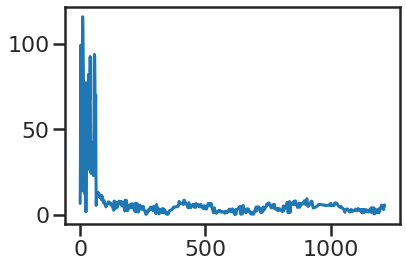

In [ ]:
df_local = pd.read_csv('high_freq_local_callogs_with_error.csv')
df_local.dropna(inplace=True)
df_local.error.plot()

In [ ]:
df_local.error.size

868

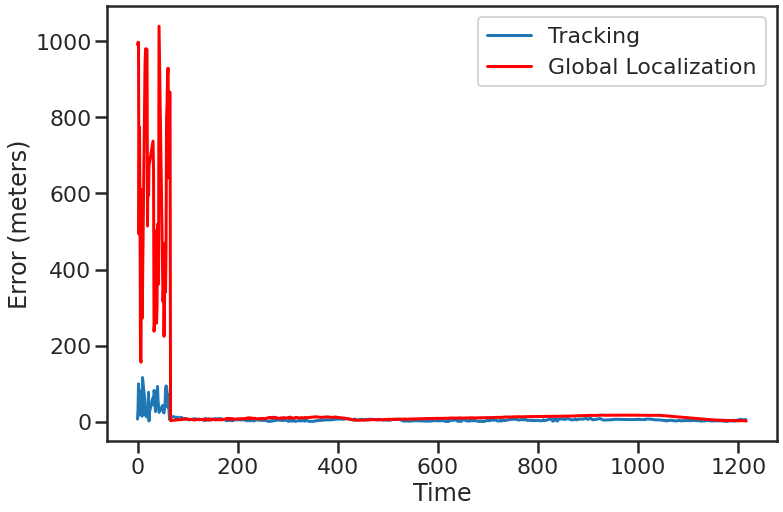

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,8))
# sns.set_theme(
sns.set_style('ticks')
sns.set_context("poster")
# sns.axes_style('whitegrid')
sns.lineplot(data=df_local.error)
sns.lineplot(data=df_global.error[:],color='red')
plt.legend(labels=["Tracking","Global Localization"])
# plt.show()

hfont = {'fontname':'Comic Sans MS'}
plt.xlabel('Time',**hfont)

plt.ylabel('Error (meters)',**hfont)
plt.savefig('local_error.png',dpi=300)

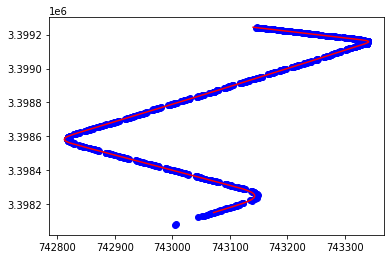

In [ ]:
plt.plot(df_local.gps_e,df_local.gps_n,c='red')
plt.scatter(df_local.pf_e,df_local.pf_n,c='blue')


In [ ]:
df_local.error[100:].mean()

4.009070741491992

In [ ]:
import osmnx as ox

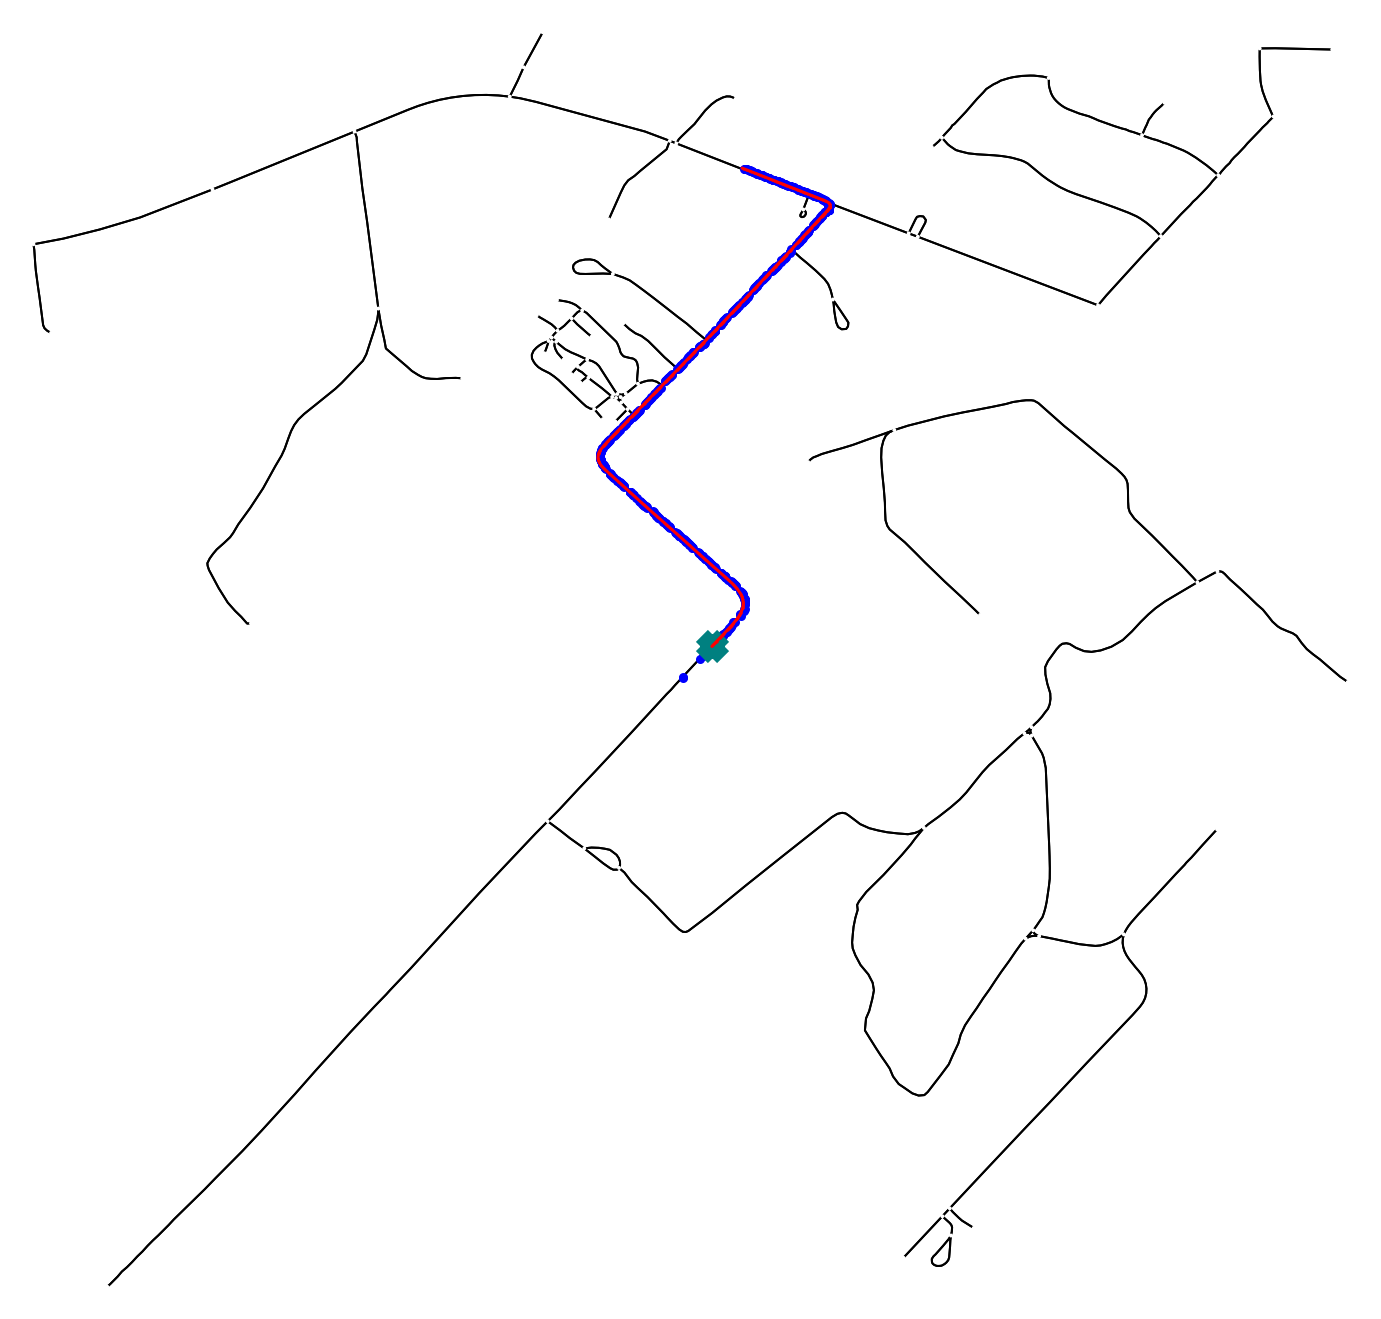

In [ ]:
g = ox.graph_from_point((30.690984,-96.46288 ),dist=1500,dist_type="bbox")
# cf = '["highway"~"motorway|motorway_link|trunk|trunk_link|primary|primary_link|secondary|secondary_link|tertiary|tertiary_link|road|road_link|service|service_link|unclassified|unclassified_link"]'
# t = {"highway": True,"building":True,"landuse":True}
# gdf = ox.geometries_from_point((30.690984,-96.46288 ),dist=1200,tags=t)
# g=ox.graph_from_place('Modena, Italy')
g = ox.project_graph(g)
# gdf= ox.projection.project_gdf(gdf)
# fig,ax = ox.plot.plot_footprints(gdf,color="white")
# g = ox.graph_from_point((743024.69,3398103.49),dist=1000)
fig,ax=ox.plot.plot_graph(g,bgcolor='white',figsize=(40,24),edge_color='black',edge_linewidth=2,show=False, close=False)
ax.plot(df_local.gps_e,df_local.gps_n,c='red',marker='.',markersize=2)
ax.scatter(df_local.pf_e,df_local.pf_n,c='blue',marker='.',linewidths=3)
ax.scatter(df_local.gps_e[0],df_local.gps_n[0],c='teal',marker='x',linewidths=30)
plt.show()
# plt.savefig('local_loc.png',format='png')
fig.savefig('local_loc.png',dpi=300)

In [ ]:
gdfs = ox.utils_graph.graph_to_gdfs(g)
gdfs.head()

NameError: name 'ox' is not defined

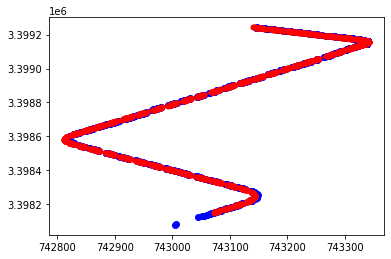

In [ ]:
plt.plot(df_local.gps_e,df_local.gps_n,c='red',marker='.',markersize=10)
plt.scatter(df_local.pf_e,df_local.pf_n,c='blue')
